# **Computational Drug Discovery : Descriptor Calculation and Dataset Preparation**

In **step 3**, we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we will be preparing this into a dataset for subsequent model building in step 4.

---

## **Download PaDEL-Descriptor**

In [3]:
# url: https://github.com/ecrl/padelpy/blob/master/README.md
! pip install padelpy

In [46]:
# https://stackoverflow.com/questions/57748687/downloading-files-in-jupyter-wget-on-windows
#Downloading the XML data files
! pip install wget
! python -m wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! python -m wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh


Saved under padel.zip

Saved under padel.sh


In [56]:
import shutil
filename ='C:/Users/HP/Drug discovery using ML and Data Analysis/padel.zip'
extract_dir = 'C:/Users/HP/Drug discovery using ML and Data Analysis/padel'
shutil.unpack_archive(filename, extract_dir )

In [12]:
#listing and sorting the downloaded files
import glob
from pathlib import Path

path_generator = Path('padel/PaDEL-Descriptor').glob('*.xml')
xml_files = [p.name for p in path_generator]

In [13]:
xml_files.remove('descriptors.xml')

In [14]:
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [15]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']


In [16]:
#Creating Data Dictionary
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

## **Load bioactivity data**

Download the curated ChEMBL bioactivity data that has been pre-processed from Parts 1 and 2 of this Bioinformatics Project series. Here we will be using the **bioactivity_data_3class_pIC50.csv** file that essentially contain the pIC50 values that we will be using for building a regression model.

In [1]:
import pandas as pd

In [3]:
df3 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [4]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
5098,5098,CHEMBL4645476,CN(C)C(=O)Oc1ccc(C(O)CNC2CCCCC2)cc1.Cl,inactive,306.406,2.7027,2.0,4.0,3.575118
5099,5099,CHEMBL4645659,COc1ccc(CCC(=O)Nc2nc(-c3cc4ccccc4oc3=O)cs2)cc1OC,active,436.489,4.5050,1.0,7.0,6.130768
5100,5100,CHEMBL513063,COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1,active,331.441,3.2431,1.0,5.0,6.292430
5101,5101,CHEMBL4640608,COc1cc(C2C3=C(CCCC3=O)NC3=C2C(=O)CCC3)ccc1OCc1...,inactive,447.506,5.1143,1.0,5.0,3.903090


In [6]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [7]:
df3_selection.head(5)

,canonical_smiles,molecule_chembl_id
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478


In [8]:
! type molecule.smi 

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478
CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1	CHEMBL130112
CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C	CHEMBL130098
CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCOCC1	CHEMBL337486
COc1ccc(-c2nc(SC)n(C(=O)N(C)C)n2)cc1	CHEMBL336538
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)c1ccccc1	CHEMBL131051
CCSc1nc(-c2ccc(OC)cc2)nn1C(=O)N1CCOCC1	CHEMBL341437
CSc1nc(-c2ccc3ccccc3c2)nn1C(=O)N(C)C	CHEMBL335033
C[C@H]1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C(=O)C(C)(C)C)cc1	CHEMBL122983
CSc1nc(-c2ccc(-c3ccccc3)cc2)nn1C(=O)N(C)C	CHEMBL338720
CSc1nc(/C=C/c2ccccc2)nn1C(=O)N(C)C	CHEMBL339995
CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCCCC1	CHEMBL335158
CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)c1ccccc1	CHEMBL131536
Cc1c(C(C)C)c(=O)on1C(=O)N1CCC[C@H](C)C1	CHEMBL106126
CC

Nc1c2c(nc3cccc(Cl)c13)C1CCC2C1	CHEMBL368196
Nc1c2c(nc3ccc(Cl)cc13)CCCC2	CHEMBL62084
Nc1c2c(nc3ccc(Cl)cc13)C1CCC2C1	CHEMBL172118
Cl.Cl.O.c1ccc(CN2CCC(CCOc3ccc(-c4ccccc4)nn3)CC2)cc1	CHEMBL1202875
Nc1c2c(nc3c1CCCO3)CCCC2	CHEMBL436367
COc1cccc2nc3c(c(N)c12)CCCC3	CHEMBL132365
Cl.Cl.c1ccc(CN2CCC(CCNc3ccc(-c4ccccc4)nn3)CC2)cc1	CHEMBL3215535
Cl.Cl.O.c1ccc(CN2CCC(CCNc3cc4c(nn3)-c3ccccc3CCC4)CC2)cc1	CHEMBL1202865
Nc1c2c(nc3cccc(F)c13)OCCC2	CHEMBL133520
Nc1c2c(nc3cnccc13)OCCC2	CHEMBL130373
Cl.Cl.O.c1ccc(CN2CCC(CCNc3cc4ccc5ccccc5c4nn3)CC2)cc1	CHEMBL1202884
Nc1c2c(nc3c1CCCC3)CCCC2	CHEMBL263198
Cc1cccc2nc3c(c(N)c12)CCCC3	CHEMBL133906
Cl.O.c1ccc(CN2CCC(CCN=c3cc4c(n[nH]3)-c3ccccc3C4)CC2)cc1	CHEMBL1204162
Nc1c2c(nc3ccc(Cl)cc13)OCCC2	CHEMBL134240
Nc1c2c(nc3cccc(F)c13)CCCC2	CHEMBL132030
Nc1c2c(nc3ncccc13)CCCC2	CHEMBL133448
Nc1c2c(nc3c1CCC3)CCCC2	CHEMBL130880
Cl.Cl.c1ccc(CN2CCC(CCSc3ccc(-c4ccccc4)nn3)CC2)cc1	CHEMBL1202874
Nc1c2c(nc3ncccc13)OCCC2	CHEMBL133441
Nc1c2c(nc3cnccc13)CCCC2	CHEMBL130427
COc1cccc2n

CN(CCCCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1	CHEMBL427090
CN(CCCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1	CHEMBL224469
CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1	CHEMBL224433
CN(CCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1	CHEMBL390737
CN(CCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1	CHEMBL427249
CN(CCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1	CHEMBL225611
C[C@H]1C=C2N3CC[C@@H](O)C24[C@H](CC(=O)[C@H]4C[C@H](O)C3)C1	CHEMBL376327
CC1=C[C@H]2[C@H](O)C(=O)[C@H]3CCCN4CCC[C@H]2[C@]34C1	CHEMBL229334
COc1cc2cc(-c3ccc(C[N+](C)(C)Cc4ccccc4)cc3)c(=O)oc2cc1OC.[I-]	CHEMBL396199
COc1ccc2c(=O)cc(-c3ccc(CN(C)Cc4ccccc4)cc3)oc2c1	CHEMBL241830
COc1ccc2oc(-c3ccc(CN(C)Cc4ccccc4)cc3)cc(=O)c2c1	CHEMBL241828
COc1cc2oc(-c3ccc(CN(C)Cc4ccccc4)cc3)cc(=O)c2cc1OC	CHEMBL241827
COc1cc2oc(-c3cccc(CN(C)Cc4ccccc4)c3)cc(=O)c2cc1OC	CHEMBL245055
CCN(Cc1ccccc1)Cc1cccc(-c2coc3cc(OC)c(OC)cc3c2=O)c1	CHEMBL388714
COc1cc2occ(-c3cccc(CN(C)Cc4ccccc4)c3)c(=O)c2cc1OC	CHEMBL245054
COc1cc2occ(-c3ccc(CN(C)Cc4ccccc4)cc3)c(=O)c2cc1OC	CHEMBL24483

CCOC(=O)C1=C(C)Nc2nc3c(c(N)c2[C@@H]1c1ccc(OC)cc1)CCCC3	CHEMBL470715
C=C(CC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4C(=O)[C@](O)(C(=O)OCC)C[C@]4(C)[C@H]3CC[C@@]21C)C(C)C	CHEMBL470866
COc1ccc2c(=O)oc3c(OC)cc(CCN(C)C)c4c(=O)oc1c2c34	CHEMBL470867
COc1c(O)cc2c3c1-c1ccccc1C[C@H]3NCC2	CHEMBL469423
Clc1ccc2c(NCCCNCCCOc3cccc4[nH]c5ccccc5c34)c3c(nc2c1)CCCC3	CHEMBL478666
Clc1ccc2c(NCCCNCCCCCCOc3cccc4[nH]c5ccccc5c34)c3c(nc2c1)CCCC3	CHEMBL474268
Clc1ccc2c(NCCCNCCCCCOc3cccc4[nH]c5ccccc5c34)c3c(nc2c1)CCCC3	CHEMBL473866
Clc1ccc2c(NCCCNCCCCOc3cccc4[nH]c5ccccc5c34)c3c(nc2c1)CCCC3	CHEMBL478667
Cc1ccc(C2CC(c3cccc(O)c3)=Nc3ccccc3S2)cc1	CHEMBL497686
Oc1cccc(C2=Nc3ccccc3SC(c3ccc(Cl)cc3)C2)c1	CHEMBL498539
Oc1cccc(C2=Nc3ccccc3SC(c3ccccc3F)C2)c1	CHEMBL526476
Oc1cccc(C2=Nc3ccccc3SC(c3ccccc3)C2)c1	CHEMBL456156
Oc1cccc(C2=Nc3ccccc3SC(c3cccc(O)c3)C2)c1	CHEMBL508510
Oc1cccc(C2=Nc3ccccc3SC(c3cccs3)C2)c1	CHEMBL498536
CC1(C)CC(=O)C2=C(C1)Nc1nc3c(c(N)c1C2c1ccccc1)CCCC3	CHEMBL512096
CC1(C)CC(=O)C2=C(C1)Nc1nc3c(c(N)c1C2c1ccncc1

Cl.O/N=C/C1=NCCCN1Cc1ccccc1	CHEMBL1952063
Cl.O/N=C/C1=NCCCN1Cc1ccc(Cl)cc1Cl	CHEMBL1952064
Cl.O/N=C/C1=NCCCN1Cc1cc(C(F)(F)F)cc(C(F)(F)F)c1	CHEMBL1952065
CCCCN1CC(C)(C)CN=C1/C=N/O.Cl	CHEMBL1952066
CCCCCN1CC(C)(C)CN=C1/C=N/O.Cl	CHEMBL1952067
CCC/N=C(/C=N/O)N(C)C.Cl	CHEMBL1952047
CCCC/N=C(/C=N/O)N(C)C.Cl	CHEMBL1952048
CCCCC/N=C(/C=N/O)N(C)C.Cl	CHEMBL1952049
CC(C)CC/N=C(/C=N/O)N(C)C.Cl	CHEMBL1952050
COCC/N=C(/C=N/O)N(C)C.Cl	CHEMBL1952051
COCCC/N=C(/C=N/O)N(C)C.Cl	CHEMBL1952052
CN(C)C(/C=N/O)=N\C1CC1.Cl	CHEMBL1952053
CN(C)C(/C=N/O)=N\C1CCC1.Cl	CHEMBL1952054
CN(C)C(/C=N/O)=N\Cc1ccccc1.Cl	CHEMBL1952055
CN(C)C(/C=N/O)=N\c1ccccc1.Cl	CHEMBL1952056
COc1ccc([C@H]2Oc3cc(O)c(C/C=C(\C)CCC=C(C)C)c(O)c3C(=O)[C@@H]2O)cc1O	CHEMBL2011402
COc1cc([C@H]2Oc3cc(O)c(C/C=C(\C)CCC=C(C)C)c(O)c3C(=O)[C@@H]2O)ccc1O	CHEMBL459258
COc1c(O)cc(C2Oc3cc(O)c(C/C=C(\C)CCC=C(C)C)c(O)c3C(=O)[C@@H]2O)cc1O	CHEMBL2011403
COc1ccc([C@@H]2CC(=O)c3c(cc(O)c(C/C=C(\C)CCC=C(C)C)c3O)O2)cc1O	CHEMBL2011404
COc1cc([C@@H]2CC(=O)c3c(cc(O)c(C/C

Clc1ccc2[nH]c(-c3ccc(OCCN4CCCCC4)cc3)nc2c1	CHEMBL2413743
Clc1ccc2[nH]c(-c3ccc(OCCN4CCCC4)cc3)nc2c1	CHEMBL2413742
CC(C)N(CCOc1ccc(-c2nc3cc(Cl)ccc3[nH]2)cc1)C(C)C	CHEMBL2413741
CCN(CC)CCOc1ccc(-c2nc3cc(Cl)ccc3[nH]2)cc1	CHEMBL2413740
CN(C)CCOc1ccc(-c2nc3cc(Cl)ccc3[nH]2)cc1	CHEMBL2413739
Oc1ccc(-c2nc3cc(Cl)ccc3[nH]2)cc1	CHEMBL2413738
Cc1ccc2[nH]c(-c3ccc(OCCN4CCOCC4)cc3)nc2c1	CHEMBL2413737
Cc1ccc2[nH]c(-c3ccc(OCCN4CCCCC4)cc3)nc2c1	CHEMBL2413736
Cc1ccc2[nH]c(-c3ccc(OCCN4CCCC4)cc3)nc2c1	CHEMBL2413735
CCN(CC)CCOc1ccc(-c2nc3cc(C)ccc3[nH]2)cc1	CHEMBL2413734
Cc1ccc2[nH]c(-c3ccc(OCCN(C)C)cc3)nc2c1	CHEMBL2413733
Cc1ccc2[nH]c(-c3ccc(O)cc3)nc2c1	CHEMBL2413732
c1ccc2[nH]c(-c3ccc(OCCN4CCOCC4)cc3)nc2c1	CHEMBL2413561
c1ccc2[nH]c(-c3ccc(OCCN4CCCCC4)cc3)nc2c1	CHEMBL2413560
c1ccc2[nH]c(-c3ccc(OCCN4CCCC4)cc3)nc2c1	CHEMBL2413559
CC(C)N(CCOc1ccc(-c2nc3ccccc3[nH]2)cc1)C(C)C	CHEMBL2413558
CCN(CC)CCOc1ccc(-c2nc3ccccc3[nH]2)cc1	CHEMBL2413745
CN(C)CCOc1ccc(-c2nc3ccccc3[nH]2)cc1	CHEMBL2413746
Oc1ccc(-c2nc3ccccc3[nH]

Nc1c2c(nc3c1C(c1ccccc1)c1ccc4cccnc4c1O3)CCCC2	CHEMBL4067497
CC(C)c1ccc(NC(=O)Oc2ccc3c(c2)[C@]2(C)CCN[C@@H]2N3)cc1	CHEMBL4089082
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(CN(C)C)c(O)c1)O2	CHEMBL4090583
CCN(CC)Cc1ccc(/C=C2\Oc3cc(OC)c(OC)cc3C2=O)cc1O	CHEMBL4075571
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(CN3CCCC3)c(O)c1)O2	CHEMBL4094805
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(CN3CCCCC3)c(O)c1)O2	CHEMBL4100760
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(CN3CCOCC3)c(O)c1)O2	CHEMBL4059887
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(CN3CCN(C)CC3)c(O)c1)O2	CHEMBL4081805
CCN1CCN(Cc2ccc(/C=C3\Oc4cc(OC)c(OC)cc4C3=O)cc2O)CC1	CHEMBL4098196
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(CN(C)Cc3ccccc3)c(O)c1)O2	CHEMBL4102562
CCN(Cc1ccc(/C=C2\Oc3cc(OC)c(OC)cc3C2=O)cc1O)Cc1ccccc1N(C)C	CHEMBL4072914
COc1cc2c(cc1OC)C(=O)/C(=C/c1ccc(O)c(CN(C)C)c1)O2	CHEMBL4069184
COc1ccc(CNc2nc(NC(N)=O)nc3ccccc23)cc1OC	CHEMBL4060687
NC(=O)Nc1nc(NCc2ccccc2)c2ccccc2n1	CHEMBL4081013
COc1ccc(CCNc2nc(NC(N)=O)nc3ccccc23)cc1OC	CHEMBL4099046
NC(=O)Nc1nc(NCCc2ccccc2)c2ccccc2n1	CHEMBL4070380
COc

COc1ccc2c(c1)CCC(CC1C=CN(Cc3cccc(C)c3)C=C1C(C)=O)C2=O	CHEMBL4170614
COc1ccc2c(c1)CCC(CC1C=CN(Cc3cccc(C(F)(F)F)c3)C=C1C(C)=O)C2=O	CHEMBL4172950
COc1ccc2c(c1)CCC(CC1C=CN(Cc3ccc(Cl)cc3)C=C1C(C)=O)C2=O	CHEMBL4162281
COc1ccc2c(c1)CCC(CC1C=CN(Cc3ccc(C)cc3)C=C1C(C)=O)C2=O	CHEMBL4175814
COc1ccc2c(c1)CCC(CC1C=CN(Cc3ccccc3C)C=C1C(N)=O)C2=O	CHEMBL4167954
COc1ccc(C(=O)CCCCc2cc[n+](Cc3cccc(Cl)c3)cc2C(N)=O)cc1OC.[Br-]	CHEMBL4170921
COc1cc2c(cc1OC)C(=O)C(CCCc1cc[n+](Cc3cccc(Cl)c3)cc1C(N)=O)C2.[Br-]	CHEMBL4162993
Cc1cc(=O)oc2cc(OCCCCCCSC(=S)N3CCCCC3)ccc12	CHEMBL4164078
Cc1cc(=O)oc2cc(OCCCCCSC(=S)N3CCCCC3)ccc12	CHEMBL4174729
Cc1cc(=O)oc2cc(OCCCCSC(=S)N3CCCCC3)ccc12	CHEMBL4167524
Cc1cc(=O)oc2cc(OCCCSC(=S)N3CCCCC3)ccc12	CHEMBL4159609
Cc1cc(=O)oc2cc(OCCSC(=S)N3CCC(N4CCCCC4)CC3)ccc12	CHEMBL4159640
Cc1cc(=O)oc2cc(OCCSC(=S)N3CCN(C(C)C)CC3)ccc12	CHEMBL4167973
Cc1cc(=O)oc2cc(OCCSC(=S)N3CCCCC3)ccc12	CHEMBL4175175
Cc1cc(=O)oc2cc(OCCSC(=S)N3CCCC3)ccc12	CHEMBL4164540
CCN(CC)C(=S)SCCOc1ccc2c(C)cc(=O)oc2c1	CHEMBL417

In [9]:
%%bash
cat molecule.smi | wc -l

5103


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [10]:
!type padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [17]:
#Importing PubChem
fp['PubChem']

'PubchemFingerprinter.xml'

In [20]:
#Setting the fingerprint module
 
from padelpy import padeldescriptor
fingerprint_output_file ='descriptors_output.csv'
fingerprint = 'PubChem'
fingerprint_descriptortypes = fp[fingerprint]
 
padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'descriptors_output.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                standardizenitro=True,
                removesalt=True,
                fingerprints=True,
               headless=True)

RuntimeError: PaDEL-Descriptor encountered an error: Jan 17, 2022 6:53:06 PM padeldescriptor.PaDELDescriptorApp StartCmd
SEVERE: Cannot read in descriptor types file
java.lang.NullPointerException
	at libpadeldescriptor.libPaDELDescriptorType.SetDescriptorTypes(Unknown Source)
	at libpadeldescriptor.libPaDELDescriptorMaster.SetDescriptorTypes(Unknown Source)
	at padeldescriptor.PaDELDescriptorApp.StartCmd(Unknown Source)
	at padeldescriptor.PaDELDescriptorApp.launchCommandLine(Unknown Source)
	at padeldescriptor.PaDELDescriptorApp.main(Unknown Source)



Can't fix the above error so proceeded Manually to calculate 'PubChem' fingerprint descriptor for molecule.smi using Padel-Descriptor.jar file  
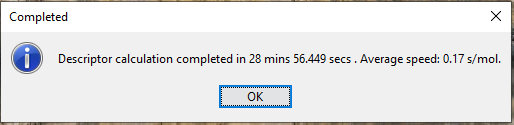

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [31]:
df3_X = pd.read_csv('descriptors_output.csv', sep =';')

In [32]:
df3_X.shape

(5103, 882)

In [33]:
df3_X.head(5)

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5099,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5100,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5101,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [35]:
df3_Y = df3['pIC50']
df3_Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
5098    3.575118
5099    6.130768
5100    6.292430
5101    3.903090
5102    4.000000
Name: pIC50, Length: 5103, dtype: float64

## **Combining X and Y variable**

In [36]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.575118
5099,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.130768
5100,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.292430
5101,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.903090


In [37]:
dataset3.to_csv('acetylcholinesterase_05_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)